(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Clustering food recipes from around the world

In this assignment, you are expected to hierarchically cluster food recipes. We will be using YY Ahn's dataset "[Recipe datasets with cuisines](http://yongyeol.com/data/scirep-cuisines-detail.zip)", which for each recipe provides a list of ingredients and the country of origin, scraped from popular recipe websites. He also provides an [ingredient and compounds dataset](http://yongyeol.com/data/ingr_comp.zip), which you could potentially also make use of, if you find it interesting.

You will be graded as follow:
* Data parsing and representation **(20 pts)**
* Clustering **(30 pts)**
* Visualization **(30 pts)**
* Short (datailed) analysis of specific cluster **(20 pts)**

---------------------------

In [1]:
# parsing and representing the data
# Hypothesis: recipes from the same continent(Asia, Africa, America, Europe) are similar

map = open("scirep-cuisines-detail/map.txt","r")
r1 = open("scirep-cuisines-detail/allr_recipes.txt","r")
r2 = open("scirep-cuisines-detail/epic_recipes.txt","r")
r3 = open("scirep-cuisines-detail/menu_recipes.txt","r")

# create a dictionary of all ingredients
ing = []
ingredients_list = {}
ingredients_count = []
country_ingredients= {}


#print(country)

# read all the recipes and create the dictionary
# dictionary is in format of country-ingredients-number
for r in [r1,r2,r3]:
    for i in r:
        ii = i.replace("\n","").split("\t")
        key = ii[0]
        ingredients = ii[1:]
        if key in country_ingredients.keys():
            for j in ingredients:
                if j in ingredients_list:
                    ingredients_list[j] += 1
                else:
                    ing.append(j)
                    ingredients_list[j] = 1
        else:
            ingredients_list = {}
            country_ingredients[key] = {}
            for j in ingredients:
                if j in ingredients_list:
                    ingredients_list[j] += 1
                else:
                    ing.append(j)
                    ingredients_list[j] = 1
                    
        country_ingredients[key] = ingredients_list

# uncomment the following line to read the dictionary
#print(country_ingredients)
                



<Container object of 4 artists>

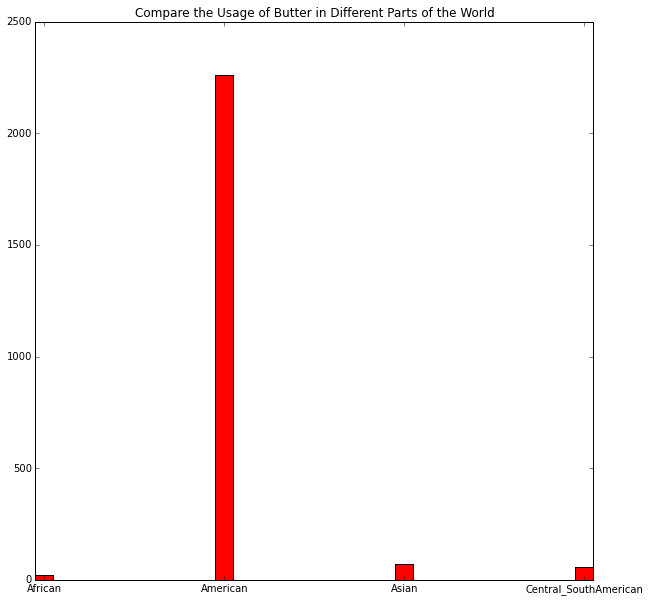

In [2]:
# the following part compares the amount of usage regrading one single ingredient in different
# parts of the world
# the ingredient and parts of the world are variables we can specify

%matplotlib inline
import scipy.cluster.hierarchy as sch
import numpy
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


scountries = sorted(country_ingredients)
ingredient_countries = []

for c in scountries:
    if 'butter' in country_ingredients[c].keys():
        val = country_ingredients[c]['butter']
        ingredient_countries.append(val)
      
    else:
        ingredient_countries.append(0)

a = [scountries[0],scountries[1],scountries[2],scountries[9]]
b = [ingredient_countries[0],ingredient_countries[1],ingredient_countries[2], ingredient_countries[9]]
fig, ax = plt.subplots(figsize = (10,10))
xx = numpy.arange(len(a))
width = 0.1
ax.set_xticks(xx + width*0.5)
ax.set_xticklabels(a)
plt.title('Compare the Usage of Butter in Different Parts of the World')
plt.bar(xx, b, color = 'r', width = width)

['African', 'American', 'Asian', 'Austria', 'Bangladesh', 'Belgium', 'Cajun_Creole', 'Canada', 'Caribbean', 'Central_SouthAmerican', 'China', 'Chinese', 'East-African', 'Eastern-Europe', 'EasternEuropean_Russian', 'English_Scottish', 'France', 'French', 'German', 'Germany', 'Greek', 'India', 'Indian', 'Indonesia', 'Iran', 'Irish', 'Israel', 'Italian', 'Italy', 'Japan', 'Japanese', 'Jewish', 'Korea', 'Lebanon', 'Malaysia', 'Mediterranean', 'Mexican', 'Mexico', 'MiddleEastern', 'Moroccan', 'Netherlands', 'North-African', 'Pakistan', 'Philippines', 'Portugal', 'Scandinavia', 'Scandinavian', 'South-African', 'South-America', 'Southern_SoulFood', 'Southwestern', 'Spain', 'Spanish_Portuguese', 'Switzerland', 'Thai', 'Thailand', 'Turkey', 'UK-and-Ireland', 'Vietnam', 'Vietnamese', 'West-African', 'asian', 'chinese', 'east_asian', 'italian', 'japanese', 'korean', 'mexico', 'western']
Chinese Thai Thailand
Cajun_Creole Caribbean Southwestern Mexican
China chinese Japanese Japan japanese


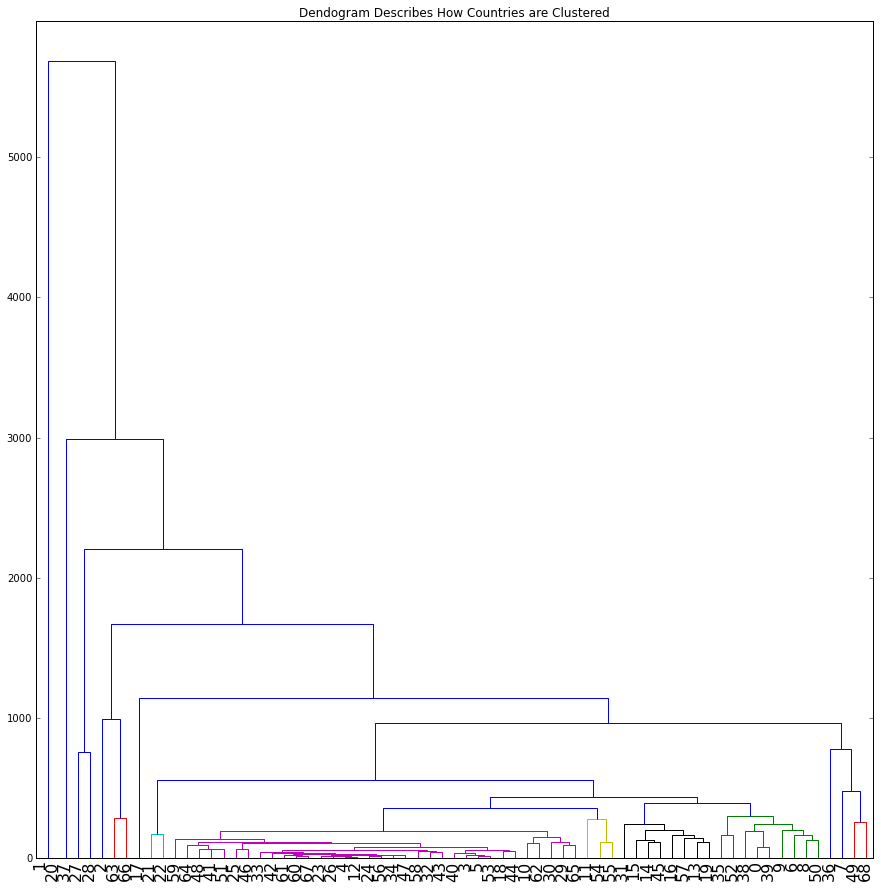

In [4]:
# clustering and visulization

singredients = sorted(ing)
country_data = numpy.zeros(shape =(len(scountries), len(ing)))
for i in country_ingredients.keys():
    dic = country_ingredients[i]
    for j in dic.keys():
        x = scountries.index(i)
        y = singredients.index(j)
        country_data[x][y] = dic[j]

        
Z2 = sch.linkage(country_data, method = 'complete', metric = 'euclidean')
fig2 = plt.figure(figsize=(15,15))
T2 = sch.dendrogram(Z2, color_threshold = 350, leaf_font_size=16)
plt.title('Dendogram Describes How Countries are Clustered')

fig2.show()

# the country list are related with the x-values in the denmograph
# the x value represents the index of country in the list, for example 1 represents Africa
# the following print line prints the country list
print scountries

# following lines are for testing which prints out countries in three small clusters
print scountries[11], scountries[54], scountries[55]
print scountries[6], scountries[8], scountries[50], scountries[36]
print scountries[10], scountries[62], scountries[30], scountries[29], scountries[65]

### References
My hypothesis was "recipes from the same continent are similiar". I used the euclidean distance to calculate the similarity and did the clustering.
My clustering result is shown in the above graph. Since some cluster's size is really large, I picked up some small-sized clusters to see if my hypothesis holds.
I picked the yellow cluster and the right part of the green cluster as two samples.
Countries in the yellow cluster are Chinese, Thai and Thailand, pretty much the same part in Asia.
Countries in the right part of green cluster are Cajun_Creole, Caribbean, Southwestern and Mexican, these are all south-western countries.
If we look into larger size clusters, we will find that the purple cluster are almost all Asian countries(which further clustered into east-asian, north-asian, etc), and the green cluster are all South-Western countries. So countries that are nearby has high posssibility to be clustered into the same cluster, which shows that nearby countries shares great similarity in their recipes.
Hence to sum up, my hypothesis holds, that recipes from the same continent part are similiar.

1. Ahn, Yong-Yeol, et al. "Flavor network and the principles of food pairing." Scientific reports 1 (2011).

In [5]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()